## **CS 4103 - Intelligent Systems**
### Assignment 2 - Applications of MLP (Dibetes Dataset)
### Submitted by: Wayne Matthew A. Dayata (20100215)

In [2]:
## Print code execution time
from datetime import datetime, timedelta

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Date and time of code execution: ", dt_string)

Date and time of code execution:  03/09/2023 23:26:01


### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")
print("Modules loaded")

Modules loaded


# Diabetes Prediction Dataset
---
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

## Part 1 - Data Preprocessing

### Importing the dataset

In [4]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [5]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [7]:
pd.DataFrame(X, columns = ["Gender","Age","Hypertension","HeartDisease","SmokingHistory","BMI","HbA1cLevel","BloodGlucoseLevel"])

,Gender,Age,Hypertension,HeartDisease,SmokingHistory,BMI,HbA1cLevel,BloodGlucoseLevel
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [8]:
pd.DataFrame(y, columns = ["Diabetes"])

,Diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [9]:
X

array([['Female', 80.0, 0, ..., 25.19, 6.6, 140],
       ['Female', 54.0, 0, ..., 27.32, 6.6, 80],
       ['Male', 28.0, 0, ..., 27.32, 5.7, 158],
       ...,
       ['Male', 66.0, 0, ..., 27.83, 5.7, 155],
       ['Female', 24.0, 0, ..., 35.42, 4.0, 100],
       ['Female', 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [10]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Encoding categorical data

Label Encoding the "Gender" column

In [11]:
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [12]:
print(X)

[[0 80.0 0 ... 25.19 6.6 140]
 [0 54.0 0 ... 27.32 6.6 80]
 [1 28.0 0 ... 27.32 5.7 158]
 ...
 [1 66.0 0 ... 27.83 5.7 155]
 [0 24.0 0 ... 35.42 4.0 100]
 [0 57.0 0 ... 22.43 6.6 90]]


One Hot Encoding the "Smoking History" column

In [13]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
print(X)

[[0.0 0.0 0.0 ... 25.19 6.6 140]
 [1.0 0.0 0.0 ... 27.32 6.6 80]
 [0.0 0.0 0.0 ... 27.32 5.7 158]
 ...
 [0.0 0.0 0.0 ... 27.83 5.7 155]
 [0.0 0.0 0.0 ... 35.42 4.0 100]
 [0.0 1.0 0.0 ... 22.43 6.6 90]]


### Splitting the dataset into the Training set and Test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print("Train set length: " + str(len(X_train)))
print("Test set length: " + str(len(X_test)))

Train set length: 80000
Test set length: 20000


## Part 2 - Building the ANN

### Initializing the ANN and its layers

In [18]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'),   # Input layer
    tf.keras.layers.Dense(units=6, activation='softmax'),   # Hidden layer
    tf.keras.layers.Dense(units=6, activation='relu'),   # Hidden layer
    tf.keras.layers.Dense(units=6, activation='softmax'),   # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [19]:
ann.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Part 3 - Training the ANN

### Training the ANN on the Training set

In [20]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 40)

Epoch 1/40


2500/2500 [==============================] - 23s 6ms/step - loss: 0.3091 - accuracy: 0.9000
Epoch 2/40
2500/2500 [==============================] - 14s 5ms/step - loss: 0.1608 - accuracy: 0.9371
Epoch 3/40
2500/2500 [==============================] - 14s 6ms/step - loss: 0.1439 - accuracy: 0.9554
Epoch 4/40
2500/2500 [==============================] - 14s 6ms/step - loss: 0.1367 - accuracy: 0.9564
Epoch 5/40
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1317 - accuracy: 0.9573
Epoch 6/40
2500/2500 [==============================] - 14s 6ms/step - loss: 0.1280 - accuracy: 0.9583
Epoch 7/40
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1252 - accuracy: 0.9589
Epoch 8/40
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1231 - accuracy: 0.9592
Epoch 9/40
2500/2500 [==============================] - 16s 6ms/step - loss: 0.1215 - accuracy: 0.9597
Epoch 10/40
2500/2500 [==============================] - 17s 7ms/step - loss: 0.1203

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [21]:
y_pre = ann.predict(X_test)
y_pred = (y_pre > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 2s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [22]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print(classification_report(y_test, y_pred, target_names=["normal","diabetes"], digits= 4))

Confusion matrix:
[[18121   176]
 [  598  1105]]
              precision    recall  f1-score   support

      normal     0.9681    0.9904    0.9791     18297
    diabetes     0.8626    0.6489    0.7406      1703

    accuracy                         0.9613     20000
   macro avg     0.9153    0.8196    0.8599     20000
weighted avg     0.9591    0.9613    0.9588     20000



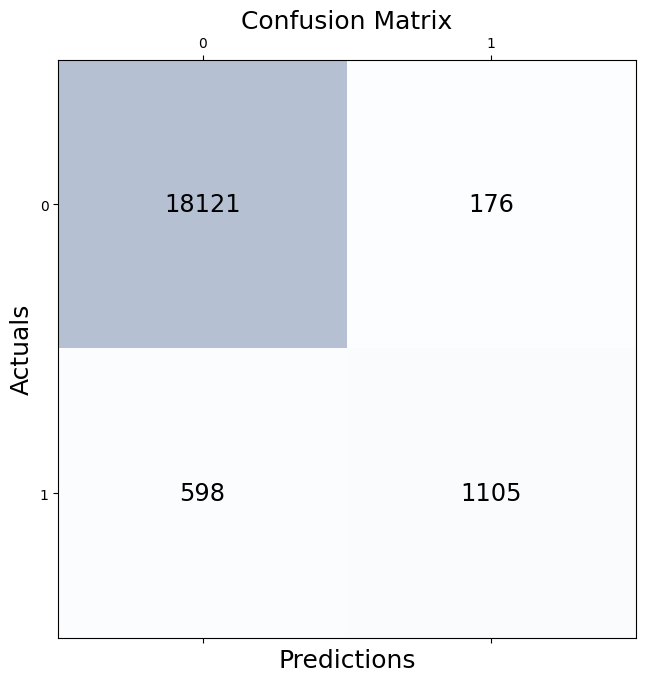

In [23]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Threshold Adjustments 
(Code taken from our thesis)

In [26]:
# experimenting thresholds
acc_list = []
pre_list = []
w_pre_list = []
rec_list = []
w_rec_list = []
f1_list = []
w_f1_list = []

for x in range(81):
  thresholds = 0.4 + x*0.005
  y_pred_adjusted = (y_pre >= thresholds).astype(int)

  acc_list.append(accuracy_score(y_test, y_pred_adjusted))
  pre_list.append(precision_score(y_test, y_pred_adjusted, pos_label= 1))
  w_pre_list.append(precision_score(y_test, y_pred_adjusted, average='weighted'))
  rec_list.append(recall_score(y_test, y_pred_adjusted, pos_label= 1))
  w_rec_list.append(recall_score(y_test, y_pred_adjusted, average='weighted'))
  f1_list.append(f1_score(y_test, y_pred_adjusted, pos_label= 1))
  w_f1_list.append(f1_score(y_test, y_pred_adjusted, average='weighted'))

# results
best_acc_ndx = np.argmax(np.array(acc_list))
best_pre_ndx = np.argmax(np.array(pre_list))
best_w_pre_ndx = np.argmax(np.array(w_pre_list))
best_rec_ndx = np.argmax(np.array(rec_list))
best_w_rec_ndx = np.argmax(np.array(w_rec_list))
best_f1_ndx = np.argmax(np.array(f1_list))
best_w_f1_ndx = np.argmax(np.array(w_f1_list))

print()
print(f'Best accuracy           - threshold [{round(0.4+0.005*best_acc_ndx,3)},{round(0.6-0.005*best_acc_ndx,3)}] -> {round(acc_list[best_acc_ndx]*100,2)}%')
print(f'Best diabetes precision - threshold [{round(0.4+0.005*best_pre_ndx,3)},{round(0.6-0.005*best_pre_ndx,3)}] -> {round(pre_list[best_pre_ndx]*100,2)}%')
print(f'Best weighted precision - threshold [{round(0.4+0.005*best_w_pre_ndx,3)},{round(0.6-0.005*best_w_pre_ndx,3)}] -> {round(w_pre_list[best_w_pre_ndx]*100,2)}%')
print(f'Best diabetes recall    - threshold [{round(0.4+0.005*best_rec_ndx,3)},{round(0.6-0.005*best_rec_ndx,3)}] -> {round(rec_list[best_rec_ndx]*100,2)}%')
print(f'Best weighted recall    - threshold [{round(0.4+0.005*best_w_rec_ndx,3)},{round(0.6-0.005*best_w_rec_ndx,3)}] -> {round(w_rec_list[best_w_rec_ndx]*100,2)}%')
print(f'Best diabetes f1-score  - threshold [{round(0.4+0.005*best_f1_ndx,3)},{round(0.6-0.005*best_f1_ndx,3)}] -> {round(f1_list[best_f1_ndx]*100,2)}%')
print(f'Best weighted f1-score  - threshold [{round(0.4+0.005*best_w_f1_ndx,3)},{round(0.6-0.005*best_w_f1_ndx,3)}] -> {round(w_f1_list[best_w_f1_ndx]*100,2)}%')
print()

# Apply the chosen threshold
best_ndx = best_w_f1_ndx # Here we use Weighted F1 score. Change here if you want a different criteria

thresholds = round(0.4+0.005*best_ndx,3)
y_pred_adjusted = (y_pre >= thresholds).astype(int) # Applying the adjusted thresholds for each class
cm = confusion_matrix(y_test, y_pred_adjusted)

#print adjusted metrics
print(f'Threshold used for adjusted predictions is: [ {round(0.4+0.005*best_ndx,3)} , {round(0.6-0.005*best_ndx,3)} ]')
print('')
print('Confusion matrix:')
print(cm)
print(classification_report(y_test, y_pred_adjusted, target_names= ["normal","diabetes"], digits= 4))

print(f'Change in accuracy           : {round((acc_list[best_ndx]-acc_list[20])*100,3)} %')
print(f'Change in diabetes precision : {round((pre_list[best_ndx]-pre_list[20])*100,3)} %')
print(f'Change in weighted precision : {round((w_pre_list[best_ndx]-w_pre_list[20])*100,3)} %')
print(f'Change in diabetes recall    : {round((rec_list[best_ndx]-rec_list[20])*100,3)} %')
print(f'Change in weighted recall    : {round((w_rec_list[best_ndx]-w_rec_list[20])*100,3)} %')
print(f'Change in diabetes F1-score  : {round((f1_list[best_ndx]-f1_list[20])*100,3)} %')
print(f'Change in weighted F1-score  : {round((w_f1_list[best_ndx]-w_f1_list[20])*100,3)} %')
print()



Best accuracy           - threshold [0.62,0.38] -> 96.2%
Best diabetes precision - threshold [0.795,0.205] -> 95.98%
Best weighted precision - threshold [0.67,0.33] -> 96.09%
Best diabetes recall    - threshold [0.4,0.6] -> 67.82%
Best weighted recall    - threshold [0.62,0.38] -> 96.2%
Best diabetes f1-score  - threshold [0.48,0.52] -> 74.27%
Best weighted f1-score  - threshold [0.485,0.515] -> 95.9%

Threshold used for adjusted predictions is: [ 0.485 , 0.515 ]

Confusion matrix:
[[18112   185]
 [  588  1115]]
              precision    recall  f1-score   support

      normal     0.9686    0.9899    0.9791     18297
    diabetes     0.8577    0.6547    0.7426      1703

    accuracy                         0.9614     20000
   macro avg     0.9131    0.8223    0.8608     20000
weighted avg     0.9591    0.9614    0.9590     20000

Change in accuracy           : 0.005 %
Change in diabetes precision : -0.492 %
Change in weighted precision : 0.004 %
Change in diabetes recall    : 0.587